In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Independent variables: age, sex, bmi, children, smoker, region

Target variable: charges

Single Linear Regression Model (using bmi as independent) with a 80:20 split ratio

MLRM attempt below

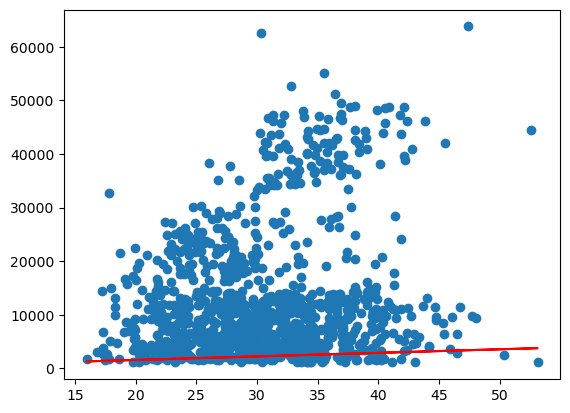

In [39]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = data['bmi']
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()


plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Making predictions

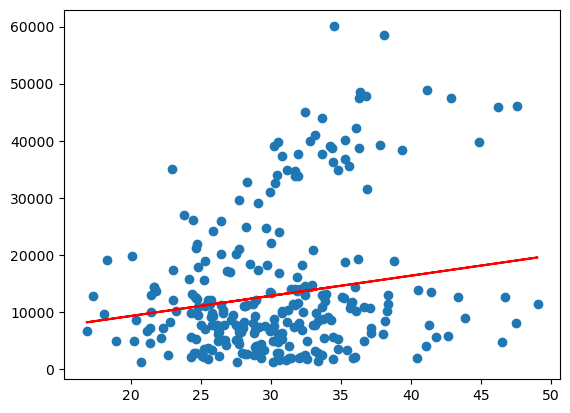

In [38]:
from sklearn.metrics import r2_score

X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

r_squared = r2_score(y_test, y_test_pred)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Multiple linear regression attempt (thanks internet):

In [53]:
# how do I change this into 2D array? no idea
# might have missed something idk
# help I've been stuck for 4 hours
# I give up :skullemoji:






from sklearn import linear_model
import seaborn as sns  
from mpl_toolkits.mplot3d import Axes3D 

Xx = data.iloc[:, 2].values
yy = data.iloc[:, 6].values


reg = linear_model.LinearRegression()  
reg.fit(Xx, yy)  


independent = data[['age', 'bmi']].values.reshape(-1,2)  
dependent = data['charges']  

x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
predictions = reg.predict(viz)  
  
r2 = reg.score(X, y)  
  
plt.style.use('fivethirtyeight')  
  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('age', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('bmi', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('charges', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k') 

ValueError: Expected 2D array, got 1D array instead:
array=[27.9  33.77 33.   ... 36.85 25.8  29.07].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.